## All library would be using on this code training dataset

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split 
from sklearn.metrics import recall_score
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay
import seaborn as sns
import math

In [3]:
dataset = "C:/Users/User/OneDrive/Python/dataset/divorce.csv"
divorce = pd.read_csv(dataset)
divorce.head() # Showing the first 120 lines from original dataframe 

,Sorry_end,Ignore_diff,begin_correct,Contact,Special_time,No_home_time,2_strangers,enjoy_holiday,enjoy_travel,common_goals,...,silence_for_harm,silence_fear_anger,I'm_right,accusations,I'm_not_guilty,I'm_not_wrong,no_hesitancy_inadequate,you're_inadequate,incompetence,Divorce_Y_N
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


## It`s rather important to get to know the data, understanting the meaning from each values.

In [4]:
divorce.describe() # 

,Sorry_end,Ignore_diff,begin_correct,Contact,Special_time,No_home_time,2_strangers,enjoy_holiday,enjoy_travel,common_goals,...,silence_for_harm,silence_fear_anger,I'm_right,accusations,I'm_not_guilty,I'm_not_wrong,no_hesitancy_inadequate,you're_inadequate,incompetence,Divorce_Y_N
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,1.776471,1.652941,1.764706,1.482353,1.541176,0.747059,0.494118,1.452941,1.458824,1.576471,...,2.552941,2.270588,2.741176,2.382353,2.429412,2.476471,2.517647,2.241176,2.011765,0.494118
std,1.627257,1.468654,1.415444,1.504327,1.632169,0.904046,0.898698,1.546371,1.557976,1.421529,...,1.371786,1.586841,1.137348,1.511587,1.405090,1.260238,1.476537,1.505634,1.667611,0.501442
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,0.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000


In [5]:
divorce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Sorry_end                      170 non-null    int64
 1   Ignore_diff                    170 non-null    int64
 2   begin_correct                  170 non-null    int64
 3   Contact                        170 non-null    int64
 4   Special_time                   170 non-null    int64
 5   No_home_time                   170 non-null    int64
 6   2_strangers                    170 non-null    int64
 7   enjoy_holiday                  170 non-null    int64
 8   enjoy_travel                   170 non-null    int64
 9   common_goals                   170 non-null    int64
 10  harmony                        170 non-null    int64
 11  freeom_value                   170 non-null    int64
 12  entertain                      170 non-null    int64
 13  people_goals        

In [6]:
## Same idea from SQL, Excel or any other visual software here, it`s filter, clean , delete any kind of 
## pointless data that just increase the memory and make the code run longer than should
divorce.isna().sum()

Sorry_end                        0
Ignore_diff                      0
begin_correct                    0
Contact                          0
Special_time                     0
No_home_time                     0
2_strangers                      0
enjoy_holiday                    0
enjoy_travel                     0
common_goals                     0
harmony                          0
freeom_value                     0
entertain                        0
people_goals                     0
dreams                           0
love                             0
happy                            0
marriage                         0
roles                            0
trust                            0
likes                            0
care_sick                        0
fav_food                         0
stresses                         0
inner_world                      0
anxieties                        0
current_stress                   0
hopes_wishes                     0
know_well           

In [7]:

X =divorce.drop(['Divorce_Y_N'], axis =1)#Erasing the target dataset
X # Showing the usefull dataset

,Sorry_end,Ignore_diff,begin_correct,Contact,Special_time,No_home_time,2_strangers,enjoy_holiday,enjoy_travel,common_goals,...,silence_instead_of_discussion,silence_for_harm,silence_fear_anger,I'm_right,accusations,I'm_not_guilty,I'm_not_wrong,no_hesitancy_inadequate,you're_inadequate,incompetence
0,2,2,4,1,0,0,0,0,0,0,...,3,2,1,3,3,3,2,3,2,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,2,3,4,4,4,4,2,2
2,2,2,2,2,1,3,2,1,1,2,...,2,3,2,3,1,1,1,2,2,2
3,3,2,3,2,3,3,3,3,3,3,...,3,2,2,3,3,3,3,2,2,2
4,2,2,1,1,1,1,0,0,0,0,...,2,2,1,2,3,2,2,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0,0,0,0,0,0,0,0,0,0,...,0,1,0,4,1,1,4,2,2,2
166,0,0,0,0,0,0,0,0,0,0,...,3,4,1,2,2,2,2,3,2,2
167,1,1,0,0,0,0,0,0,0,1,...,2,3,0,2,0,1,1,3,0,0
168,0,0,0,0,0,0,0,0,0,0,...,4,3,3,2,2,3,2,4,3,1


In [8]:
y = divorce['Divorce_Y_N']
y

0      1
1      1
2      1
3      1
4      1
      ..
165    0
166    0
167    0
168    0
169    0
Name: Divorce_Y_N, Length: 170, dtype: int64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=None)
method = RandomForestClassifier()
parametrs = {'n_estimators': range(10, 50, 10),
'max_depth': range(1, 12, 2),
'min_samples_leaf': range(1, 7),
'min_samples_split': range(2, 9, 2)}
grid_search = GridSearchCV(method, parametrs, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


{'max_depth': 1,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 10}

In [10]:
best_estimator = grid_search.best_estimator_
best_estimator.score(X_test,y_test)
#Above we have the measure from our RandomForestClassifier on this dataset

0.9649122807017544

In [11]:
feature_importance =best_estimator.feature_importances_
feature_importance_df = pd.DataFrame({'features': list(X_train),
'feature_importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values('feature_importance', ascending=False)
feature_importance_df

,features,feature_importance
25,anxieties,0.2
36,not_calm,0.2
17,marriage,0.2
15,love,0.1
16,happy,0.1
7,enjoy_holiday,0.1
8,enjoy_travel,0.1
32,negative_personality,0.0
33,offensive_expressions,0.0
34,insult,0.0


In [12]:
X_short = X[['hate_subjects', 'roles', 'dreams', 'humiliate', 'likes',
'happy', 'marriage', 'love','freeom_value', 'anxieties',
'enjoy_travel', 'Ignore_diff', 'Special_time', 'care_sick']]

In [13]:
X_short ## Printing some characteristics from broken marriage

,hate_subjects,roles,dreams,humiliate,likes,happy,marriage,love,freeom_value,anxieties,enjoy_travel,Ignore_diff,Special_time,care_sick
0,1,0,0,1,0,0,0,1,0,0,0,2,0,0
1,4,3,4,2,1,4,4,4,3,1,4,4,4,1
2,1,3,3,1,1,3,3,3,4,2,1,2,1,0
3,3,3,3,1,1,3,3,3,3,1,3,2,3,1
4,0,2,1,0,1,1,1,1,1,2,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0,0,0,0,0,0,0,0,0,0,0,0,0,0
166,1,0,0,1,0,0,0,0,0,0,0,0,0,0
167,1,0,0,0,0,0,0,1,1,1,0,1,0,0
168,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [14]:
X_train_sh, X_test_sh, y_train_sh, y_test_sh = train_test_split(X_short, y, test_size=0.33)
method = RandomForestClassifier()
parametrs = {'n_estimators': range(10, 50, 10),
'max_depth': range(1, 12, 2),
'min_samples_leaf': range(1, 7),
'min_samples_split': range(2, 9, 2)}
grid_search = GridSearchCV(method, parametrs, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_sh, y_train_sh)
grid_search.best_params_

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


{'max_depth': 1,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 20}

In [15]:
best_estimator = grid_search.best_estimator_
best_estimator.score(X_test_sh, y_test_sh)

0.9824561403508771

## Showing by pizza graphics the aproximately value from each characteristics from a broken marriage

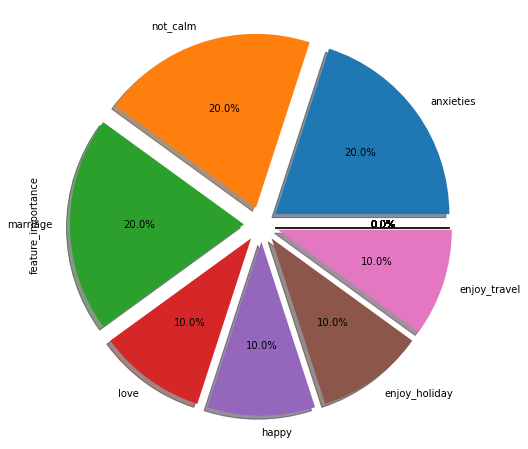

In [16]:
feature_importance_df.plot.pie(
explode=[0.1]*len(X_train.columns),
labels = feature_importance_df.features,
y = 'feature_importance',
autopct='%1.1f%%',
shadow=True,
legend=False,
figsize=(8, 8));

<AxesSubplot:>

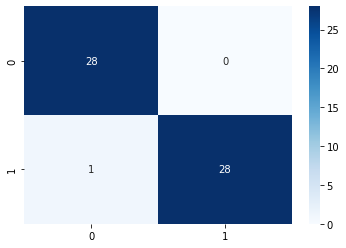

In [17]:
y_pred = best_estimator.predict(X_test_sh)
sns.heatmap(confusion_matrix(y_test_sh, y_pred), annot=True, cmap="Blues")

<AxesSubplot:>

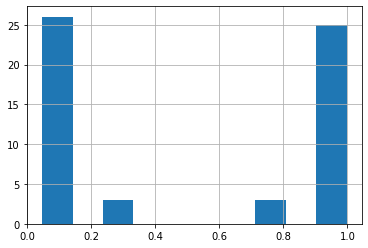

In [18]:
propability = best_estimator.predict_proba(X_test_sh)
true_probability = propability[:,1]
pd.Series(true_probability).hist()

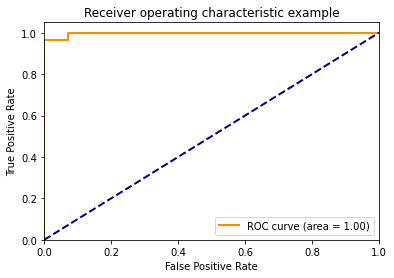

In [19]:
fpr, tpr, thresholds = roc_curve(y_test_sh, true_probability)
roc_auc= auc(fpr, tpr)
lw=2
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

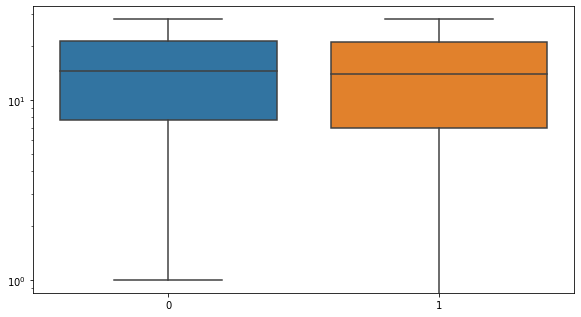

In [20]:
a4_dims = (9.7, 5.27)
fig, ax = plt.subplots(figsize=a4_dims)
g = sns.boxplot(data=confusion_matrix(y_test_sh, y_pred),linewidth=1.5,ax=ax)
g.set_yscale("log")

### Using DecisionTreeClassifier  with pedagogical way to explain and understand your only aplication

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier 
from sklearn import datasets
from sklearn import tree
# Fit the classifier with default hyper-parameters
# Prepare the data data
iris = datasets.load_iris()
X = iris.data
y = iris.target
# Fit the classifier with default hyper-parameters
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)


In [29]:
text_representation = tree.export_text(clf)
print(text_representation)


|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_0 <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  6.95
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



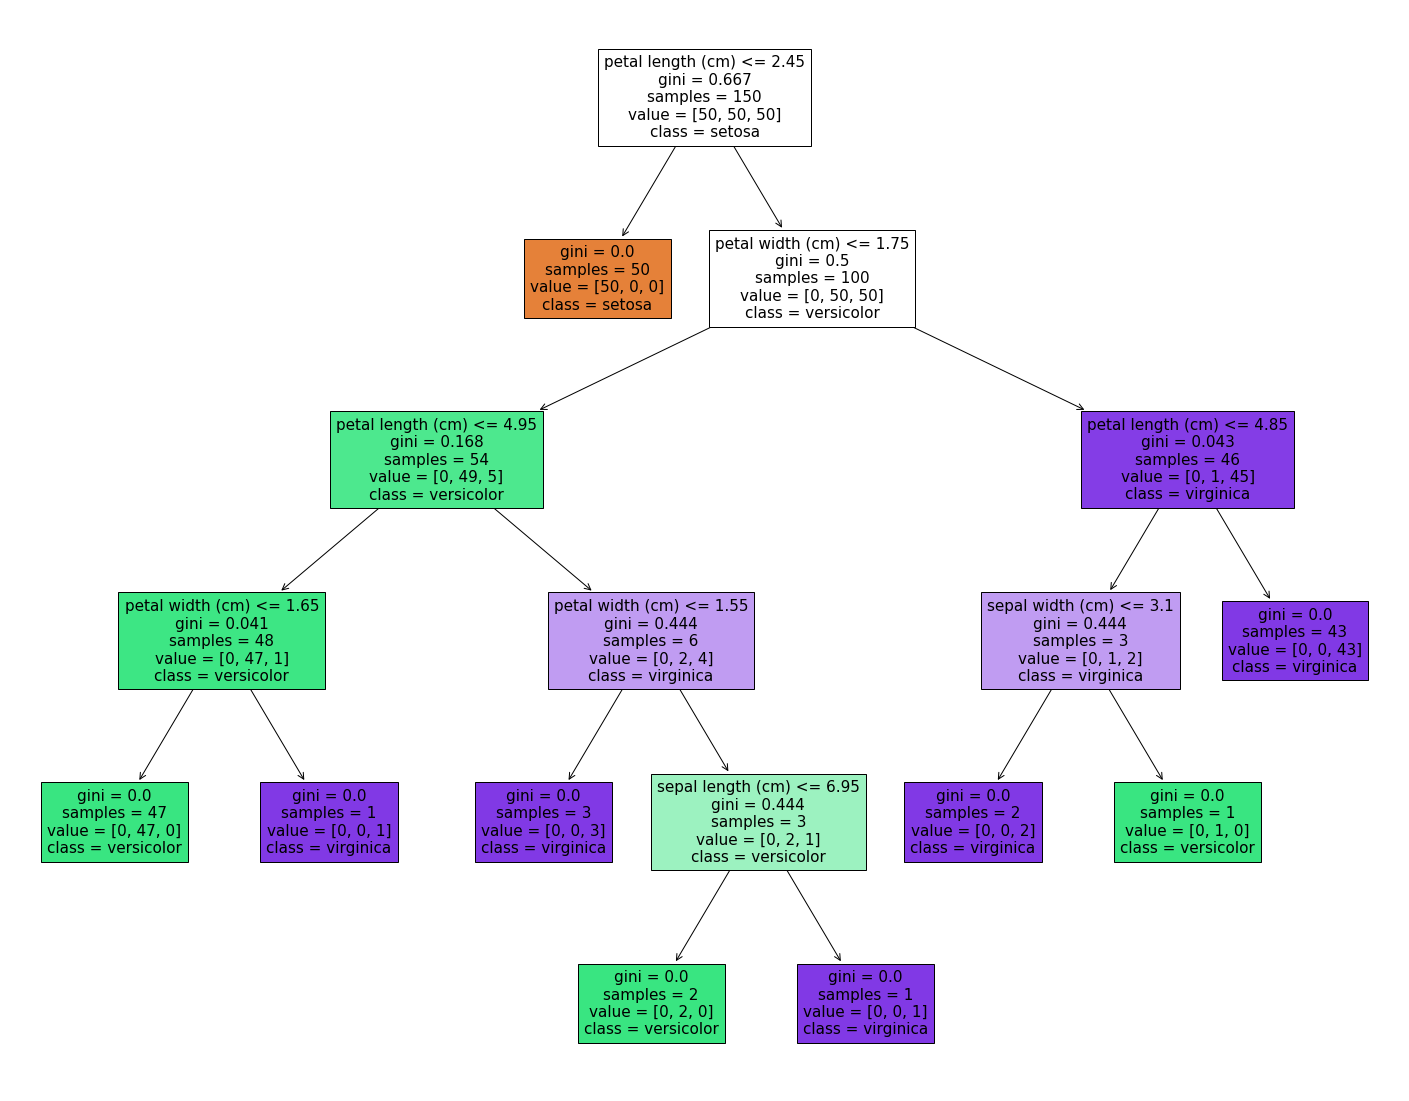

In [38]:
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)
